In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
!pip install contextily
import contextily as ctx

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

# Correzione Verifica 1

In [ ]:
giardini = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/parchi.geojson')
giardini

,Municipio,Codice area,VIA,LOCALITA,SPECIFICA_LOCALITA,Tipo,Mese,Orario apertura,Orario chiusura,Note,Location,Longitudine,Latitudine,geometry
0,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,GENNAIO,7,19,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
1,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,FEBBRAIO,7,19,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
2,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,MARZO,7,20,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
3,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,APRILE,7,21,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
4,1,1082,giardino,Fallaci Oriana,area verde di via Crivelli - Quadronno,Calcio a 7,MAGGIO,7,22,None,"45.45328556, 9.194352193",9.194352,45.453286,POINT (9.19435 45.45329)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,AGOSTO,7,22:30,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6368,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,SETTEMBRE,7,21,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6369,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,OTTOBRE,7,20,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)
6370,9,9546,parco della,Torre,giardino a scomputo compreso tra le vie Sarca ...,Basket,NOVEMBRE,7,20,None,"45.521971, 9.213884",9.213884,45.521971,POINT (9.21388 45.52197)


In [ ]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm')
quartieri

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
#1
user = str(input())
lst = list(quartieri['NIL'])
if user not in lst:
  print('il quartiere inserito non esiste')
else:
  quar = quartieri[quartieri.NIL == user]
  giardino = giardini[giardini.within(quar.geometry.squeeze())]


TRENNO


In [ ]:
#2
quartieri2 = quartieri[['NIL','geometry']]
giardini2 = giardini[['VIA','LOCALITA','geometry']]
df1 = geopandas.sjoin(giardini2,quartieri2,op='within',how='left')
df1[['NIL','VIA','LOCALITA']]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,NIL,VIA,LOCALITA
0,PORTA VIGENTINA - PORTA LODOVICA,giardino,Fallaci Oriana
1,PORTA VIGENTINA - PORTA LODOVICA,giardino,Fallaci Oriana
2,PORTA VIGENTINA - PORTA LODOVICA,giardino,Fallaci Oriana
3,PORTA VIGENTINA - PORTA LODOVICA,giardino,Fallaci Oriana
4,PORTA VIGENTINA - PORTA LODOVICA,giardino,Fallaci Oriana
...,...,...,...
6367,BICOCCA,parco della,Torre
6368,BICOCCA,parco della,Torre
6369,BICOCCA,parco della,Torre
6370,BICOCCA,parco della,Torre


In [ ]:
#3
df2 = pd.merge(df1,quartieri,how='outer',on='NIL')
Num_giardini = df2.groupby('NIL')['LOCALITA'].count().reset_index()
Num_giardini.sort_values(by='LOCALITA',ascending=False)

,NIL,LOCALITA
35,LORENTEGGIO,312
1,AFFORI,252
48,PARCO BOSCO IN CITTA',240
44,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,240
62,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,228
...,...,...
73,SARPI,0
54,PORTA GARIBALDI - PORTA NUOVA,0
71,ROSERIO,0
69,RONCHETTO DELLE RANE,0


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


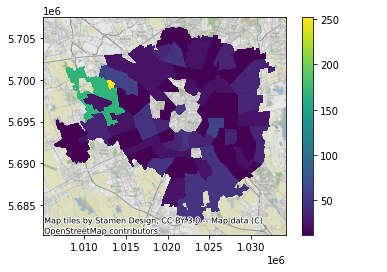

In [ ]:
#4
giardequart = geopandas.sjoin(quartieri,giardini,op='contains')
ngiard = giardequart.groupby('LOCALITA')['VIA'].count().reset_index()
ngiardequartieri=pd.merge(giardequart,ngiard,how='inner',on='LOCALITA')
ax = ngiardequartieri.to_crs(3857).plot(legend=True,column='VIA_y')
ctx.add_basemap(ax)

# Correzzione Verififca 2

In [ ]:
bus_tram = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/tpl_percorsi_shp.zip')
bus_tram

,linea,mezzo,percorso,verso,nome,tipo_perc,lung_km,num_ferm,geometry
0,1,TRAM,12560,Di,Roserio - Greco,Canonico,13.82,48,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,TRAM,9457,As,Greco - Roserio,Canonico,13.97,47,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,TRAM,10930,As,Lunigiana - 24 Maggio (LAV. MONUMENTALE),Canonico,10.12,35,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,TRAM,10933,Di,24 Maggio - Lunigiana (LAV. MONUMENTALE),Canonico,9.99,35,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,BUS,10025,As,Gratosoglio - P.za Diaz,Canonico,7.35,21,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...,...,...,...,...,...,...,...
414,965,BUS,7613,None,Milano - Pioltello,Canonico,11.36,16,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,BUS,7814,Di,Lotto M1 M5 - Famagosta M2,Canonico,8.26,23,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,BUS,9899,As,Famagosta M2 - Lotto M1 M5,Canonico,7.86,23,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,BUS,11652,None,Noverasco - Vigentino,Canonico,3.90,7,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [ ]:
#1
user = input()
lst = list(bus_tram['nome'])
if user not in lst:
  print('il percorso inserito non esiste')
else:
  bus_tramUtente = bus_tram[bus_tram.nome==user]
  quartiere = quartieri[quartieri.intersects(bus_tramUtente.geometry.squeeze())]
print(quartiere['NIL'])

Vigentino - Noverasco
24                 QUINTOSOLE
38    VIGENTINO - Q.RE FATIMA
55        PARCO DELLE ABBAZIE
Name: NIL, dtype: object


In [ ]:
#2
bus_tram2 = bus_tram[['linea','geometry']]
bus_tram2

,linea,geometry
0,1,"LINESTRING (9.11976 45.51743, 9.11987 45.51742..."
1,1,"LINESTRING (9.21625 45.49493, 9.21538 45.49486..."
2,10,"LINESTRING (9.20557 45.49136, 9.20555 45.49137..."
3,10,"LINESTRING (9.17930 45.45195, 9.17931 45.45195..."
4,115,"LINESTRING (9.17375 45.40309, 9.17381 45.40305..."
...,...,...
414,965,"LINESTRING (9.21957 45.48438, 9.21998 45.48436..."
415,98,"LINESTRING (9.14160 45.47964, 9.14166 45.47953..."
416,98,"LINESTRING (9.16884 45.43677, 9.16884 45.43673..."
417,99,"LINESTRING (9.21222 45.39490, 9.21216 45.39514..."


In [ ]:
#3


In [ ]:
#4